In [162]:

import pandas as pd# Reintentar cargar el CSV con otra codificación
ruta_csv = "/content/sample_data/demanda.csv"
try:
    df = pd.read_csv(ruta_csv, encoding='latin1')
    print("Archivo cargado con éxito usando la codificación 'latin1'.")
except UnicodeDecodeError:
    df = pd.read_csv(ruta_csv, encoding='ISO-8859-1')
    print("Archivo cargado con éxito usando la codificación 'ISO-8859-1'.")

# Ver las primeras filas para familiarizarnos con los datos
print("Primeras filas del DataFrame:")
print(df.head())

# Resumen de las columnas y sus tipos de datos
print("\nResumen de columnas y tipos de datos:")
print(df.info())

# Revisar valores únicos por columna
print("\nValores únicos por columna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} únicos")

# Estadísticas descriptivas básicas
print("\nEstadísticas descriptivas:")
print(df.describe(include='all'))

# Verificar si hay valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

Archivo cargado con éxito usando la codificación 'latin1'.
Primeras filas del DataFrame:
      Fecha   VariedadPapa  PMax  PMin  PProm  Volumen
0  ENE-2015  Papa Amarilla   3.0   1.1   1.72   1968.0
1  FEB-2015  Papa Amarilla   1.7   1.4   1.52   1290.0
2  MAR-2015  Papa Amarilla   2.2   1.4   1.64   1629.0
3  ABR-2015  Papa Amarilla   1.4   0.9   1.16   1286.0
4  MAY-2015  Papa Amarilla   1.6   1.0   1.23   1210.0

Resumen de columnas y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fecha         1320 non-null   object 
 1   VariedadPapa  1320 non-null   object 
 2   PMax          1265 non-null   float64
 3   PMin          1265 non-null   float64
 4   PProm         1265 non-null   float64
 5   Volumen       1320 non-null   float64
dtypes: float64(4), object(2)
memory usage: 62.0+ KB
None

Valores únicos por columna:
Fecha

In [163]:
# Ver las clases y frecuencia en la columna 'VariedadPapa'
print("Clases y frecuencia en 'VariedadPapa':")
print(df['VariedadPapa'].value_counts())


Clases y frecuencia en 'VariedadPapa':
VariedadPapa
Papa Amarilla        120
Papa Blanca          120
Papa Canchan         120
Papa Color           120
Papa Huamantanga     120
Papa Huayro          120
Papa Negra Andina    120
Papa Perricholi      120
Papa Peruanita       120
Papa Unica           120
Papa Yungay          120
Name: count, dtype: int64


## A tratar con los valores nulos

In [164]:
# Filtrar filas con valores nulos en precios
nulos_precios = df[df[['PMax', 'PMin', 'PProm']].isnull().any(axis=1)]
print("\nFilas con valores nulos en precios:")
print(nulos_precios)




Filas con valores nulos en precios:
        Fecha     VariedadPapa  PMax  PMin  PProm  Volumen
905  JUN-2020  Papa Perricholi   NaN   NaN    NaN      0.0
906  JUL-2020  Papa Perricholi   NaN   NaN    NaN      0.0
907  AGO-2020  Papa Perricholi   NaN   NaN    NaN      0.0
908  SEP-2020  Papa Perricholi   NaN   NaN    NaN      0.0
909  OCT-2020  Papa Perricholi   NaN   NaN    NaN      0.0
910  NOV-2020  Papa Perricholi   NaN   NaN    NaN      0.0
911  DIC-2020  Papa Perricholi   NaN   NaN    NaN      0.0
912  ENE-2021  Papa Perricholi   NaN   NaN    NaN      0.0
913  FEB-2021  Papa Perricholi   NaN   NaN    NaN      0.0
914  MAR-2021  Papa Perricholi   NaN   NaN    NaN      0.0
915  ABR-2021  Papa Perricholi   NaN   NaN    NaN      0.0
916  MAY-2021  Papa Perricholi   NaN   NaN    NaN      0.0
917  JUN-2021  Papa Perricholi   NaN   NaN    NaN      0.0
918  JUL-2021  Papa Perricholi   NaN   NaN    NaN      0.0
919  AGO-2021  Papa Perricholi   NaN   NaN    NaN      0.0
920  SEP-2021  Papa

In [165]:
# Diccionario para mapear los meses abreviados en español a sus números correspondientes
meses_map = {
    'ENE': '01', 'FEB': '02', 'MAR': '03', 'ABR': '04', 'MAY': '05', 'JUN': '06',
    'JUL': '07', 'AGO': '08', 'SET': '09', 'SEP': '09', 'OCT': '10', 'NOV': '11', 'DIC': '12'
}

# Función para convertir ENE-2015 a 2015-01-01
def convertir_fecha_manual(fecha):
    # Dividir la fecha en partes (ej., 'ENE-2015' -> ['ENE', '2015'])
    partes = fecha.split('-')
    mes = meses_map.get(partes[0].upper(), '01')  # Buscar el mes en el diccionario, predeterminado a '01'
    anio = partes[1]
    return f"{anio}-{mes}-01"  # Formato YYYY-MM-DD

# Aplicar la conversión manual a la columna 'Fecha'
df['Fecha'] = df['Fecha'].apply(convertir_fecha_manual)

# Convertir la columna 'Fecha' a tipo datetime después de la conversión
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Filtrar los datos de "Papa Perricholi" y dentro del rango de fechas
filtered_df = df[(df['VariedadPapa'] == "Papa Perricholi") & (df['Fecha'] >= "2015-01-01") & (df['Fecha'] <= "2020-05-31")]

# Verificar el filtrado
print(filtered_df.head())
print(filtered_df['Fecha'].unique())


         Fecha     VariedadPapa  PMax  PMin  PProm  Volumen
840 2015-01-01  Papa Perricholi   2.0  0.80   1.10    165.0
841 2015-02-01  Papa Perricholi   1.4  1.10   1.25     29.0
842 2015-03-01  Papa Perricholi   1.4  0.90   1.05    155.0
843 2015-04-01  Papa Perricholi   1.1  0.55   0.77    315.0
844 2015-05-01  Papa Perricholi   0.8  0.50   0.61    293.0
<DatetimeArray>
['2015-01-01 00:00:00', '2015-02-01 00:00:00', '2015-03-01 00:00:00',
 '2015-04-01 00:00:00', '2015-05-01 00:00:00', '2015-06-01 00:00:00',
 '2015-07-01 00:00:00', '2015-08-01 00:00:00', '2015-09-01 00:00:00',
 '2015-10-01 00:00:00', '2015-11-01 00:00:00', '2015-12-01 00:00:00',
 '2016-01-01 00:00:00', '2016-02-01 00:00:00', '2016-03-01 00:00:00',
 '2016-04-01 00:00:00', '2016-05-01 00:00:00', '2016-06-01 00:00:00',
 '2016-07-01 00:00:00', '2016-08-01 00:00:00', '2016-09-01 00:00:00',
 '2016-10-01 00:00:00', '2016-11-01 00:00:00', '2016-12-01 00:00:00',
 '2017-01-01 00:00:00', '2017-02-01 00:00:00', '2017-03-01 00:00

         Fecha     VariedadPapa  PMax  PMin  PProm  Volumen
840 2015-01-01  Papa Perricholi   2.0  0.80   1.10    165.0
841 2015-02-01  Papa Perricholi   1.4  1.10   1.25     29.0
842 2015-03-01  Papa Perricholi   1.4  0.90   1.05    155.0
843 2015-04-01  Papa Perricholi   1.1  0.55   0.77    315.0
844 2015-05-01  Papa Perricholi   0.8  0.50   0.61    293.0
         Fecha     VariedadPapa  PMax  PMin  PProm  Volumen
900 2020-01-01  Papa Perricholi  0.90  0.50   0.67    177.0
901 2020-02-01  Papa Perricholi  1.00  0.50   0.65     31.0
902 2020-03-01  Papa Perricholi  1.10  0.60   1.00      1.0
903 2020-04-01  Papa Perricholi  0.70  0.65   0.69      0.0
904 2020-05-01  Papa Perricholi  0.45  0.40   0.43      3.0


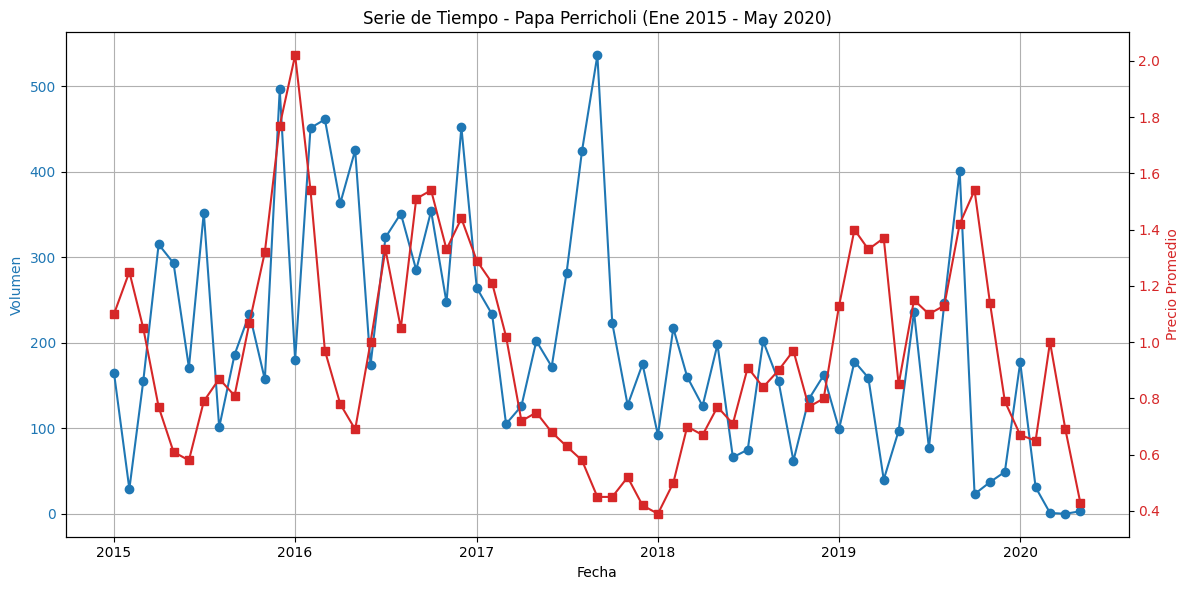

In [166]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'Fecha' en un formato de fecha adecuado
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b-%Y', errors='coerce')

# Filtrar los datos de "Papa Perricholi" y dentro del rango de fechas
filtered_df = df[(df['VariedadPapa'] == "Papa Perricholi") & (df['Fecha'] >= "2015-01-01") & (df['Fecha'] <= "2020-05-31")]

# Verificar el filtrado
print(filtered_df.head())
print(filtered_df.tail())

# Configurar el gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eje principal para el volumen
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Volumen', color='tab:blue')
ax1.plot(filtered_df['Fecha'], filtered_df['Volumen'], marker='o', color='tab:blue', label='Volumen')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

# Eje secundario para el precio promedio
ax2 = ax1.twinx()
ax2.set_ylabel('Precio Promedio', color='tab:red')
ax2.plot(filtered_df['Fecha'], filtered_df['PProm'], marker='s', color='tab:red', label='Precio Promedio')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Añadir título y ajustar
plt.title('Serie de Tiempo - Papa Perricholi (Ene 2015 - May 2020)')
fig.tight_layout()

# Mostrar el gráfico
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


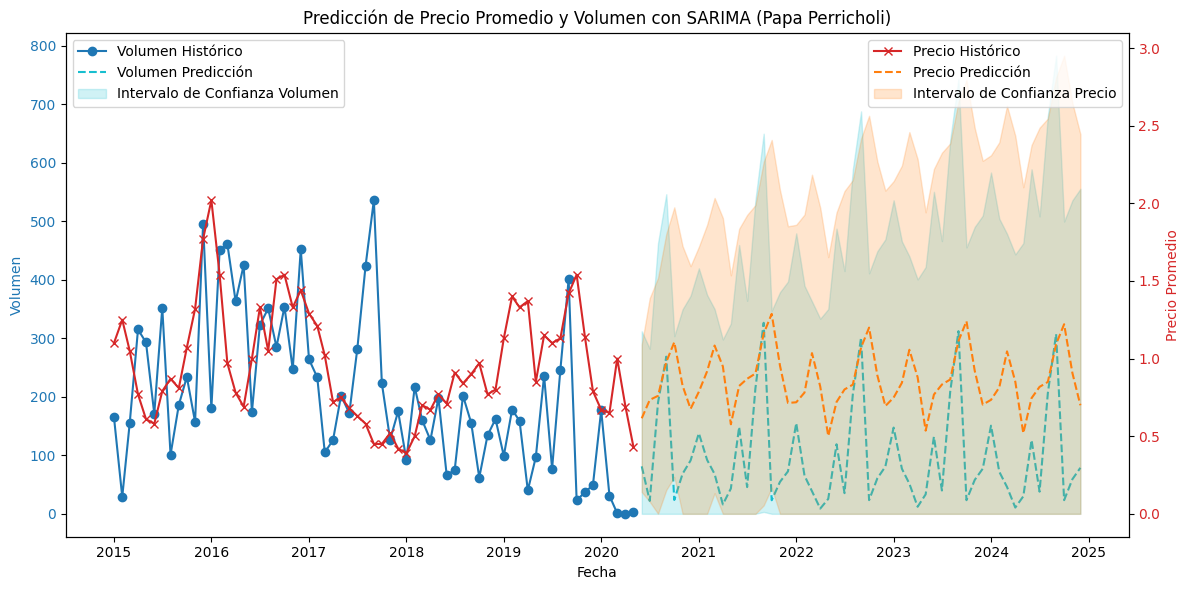

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler

# Convertir la columna 'Fecha' en un formato de fecha adecuado
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b-%Y', errors='coerce')

# Filtrar los datos de "Papa Perricholi"
data = df[df['VariedadPapa'] == "Papa Perricholi"].copy()

# Rellenar valores faltantes
data['PProm'] = data['PProm'].ffill()
data['Volumen'] = data['Volumen'].ffill()

# Filtrar el rango de fechas hasta mayo 2020
data = data[data['Fecha'] <= "2020-05-31"]

# Configurar la fecha como índice
data.set_index('Fecha', inplace=True)

# Parámetros de SARIMA ajustados
sarima_order_price = (1, 0, 1)  # Orden SARIMA para precio
seasonal_order_price = (1, 1, 0, 12)  # Orden estacional para precio

sarima_order_volume = (1, 0, 1)  # Orden SARIMA para volumen
seasonal_order_volume = (1, 1, 0, 12)  # Orden estacional para volumen

# Modelo para el precio promedio
model_price = SARIMAX(data['PProm'],
                      order=sarima_order_price,
                      seasonal_order=seasonal_order_price,
                      enforce_stationarity=False,
                      enforce_invertibility=False)
results_price = model_price.fit(disp=False)

# Modelo para el volumen
model_volume = SARIMAX(data['Volumen'],
                       order=sarima_order_volume,
                       seasonal_order=seasonal_order_volume,
                       enforce_stationarity=False,
                       enforce_invertibility=False)
results_volume = model_volume.fit(disp=False)

# Predicción futura hasta diciembre 2024
future_steps = (2024 - 2020) * 12 + 7  # Meses entre junio 2020 y diciembre 2024
future_dates = pd.date_range(data.index[-1] + pd.DateOffset(months=1), periods=future_steps, freq='MS')

# Predicciones para el precio promedio
forecast_price = results_price.get_forecast(steps=future_steps)
predicted_price = forecast_price.predicted_mean.clip(lower=0)  # Limitar valores a >= 0
conf_int_price = forecast_price.conf_int()
conf_int_price[conf_int_price < 0] = 0  # Ajustar límites de intervalo

# Predicciones para el volumen
forecast_volume = results_volume.get_forecast(steps=future_steps)
predicted_volume = forecast_volume.predicted_mean.clip(lower=0)  # Limitar valores a >= 0
conf_int_volume = forecast_volume.conf_int()
conf_int_volume[conf_int_volume < 0] = 0  # Ajustar límites de intervalo

# Crear un DataFrame para las predicciones
forecast_df = pd.DataFrame({
    'Fecha': future_dates,
    'Precio_Predicho': predicted_price,
    'Volumen_Predicho': predicted_volume
}).set_index('Fecha')

# Graficar resultados ajustados
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eje izquierdo para el volumen
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Volumen', color='tab:blue')
ax1.plot(data.index, data['Volumen'], label='Volumen Histórico', color='tab:blue', marker='o')
ax1.plot(forecast_df.index, forecast_df['Volumen_Predicho'], label='Volumen Predicción', color='tab:cyan', linestyle='dashed')
ax1.fill_between(forecast_df.index,
                 conf_int_volume.iloc[:, 0],
                 conf_int_volume.iloc[:, 1],
                 color='tab:cyan', alpha=0.2, label='Intervalo de Confianza Volumen')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# Eje derecho para el precio promedio
ax2 = ax1.twinx()
ax2.set_ylabel('Precio Promedio', color='tab:red')
ax2.plot(data.index, data['PProm'], label='Precio Histórico', color='tab:red', marker='x')
ax2.plot(forecast_df.index, forecast_df['Precio_Predicho'], label='Precio Predicción', color='tab:orange', linestyle='dashed')
ax2.fill_between(forecast_df.index,
                 conf_int_price.iloc[:, 0],
                 conf_int_price.iloc[:, 1],
                 color='tab:orange', alpha=0.2, label='Intervalo de Confianza Precio')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

# Título del gráfico
plt.title('Predicción de Precio Promedio y Volumen con SARIMA (Papa Perricholi)')
plt.tight_layout()
plt.show()


### MAE y RMSE: Mientras más bajos, mejor. Evalúan el error absoluto y cuadrático.

In [168]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Normalizar los valores para que las métricas sean comparables
max_price = data['PProm'].max()
max_volume = data['Volumen'].max()

# Escalado de valores reales y predichos para el cálculo de métricas
scaled_real_price = data['PProm'] / max_price
scaled_real_volume = data['Volumen'] / max_volume

scaled_pred_price = train_pred_price / max_price
scaled_pred_volume = train_pred_volume / max_volume

# MAE Normalizado
mae_price = mean_absolute_error(scaled_real_price, scaled_pred_price)
mae_volume = mean_absolute_error(scaled_real_volume, scaled_pred_volume)
print(f"MAE Normalizado (Precio Promedio): {mae_price:.4f}")
print(f"MAE Normalizado (Volumen): {mae_volume:.4f}")

# RMSE Normalizado
rmse_price = np.sqrt(mean_squared_error(scaled_real_price, scaled_pred_price))
rmse_volume = np.sqrt(mean_squared_error(scaled_real_volume, scaled_pred_volume))
print(f"RMSE Normalizado (Precio Promedio): {rmse_price:.4f}")
print(f"RMSE Normalizado (Volumen): {rmse_volume:.4f}")



MAE Normalizado (Precio Promedio): 0.1262
MAE Normalizado (Volumen): 0.2060
RMSE Normalizado (Precio Promedio): 0.1657
RMSE Normalizado (Volumen): 0.2651


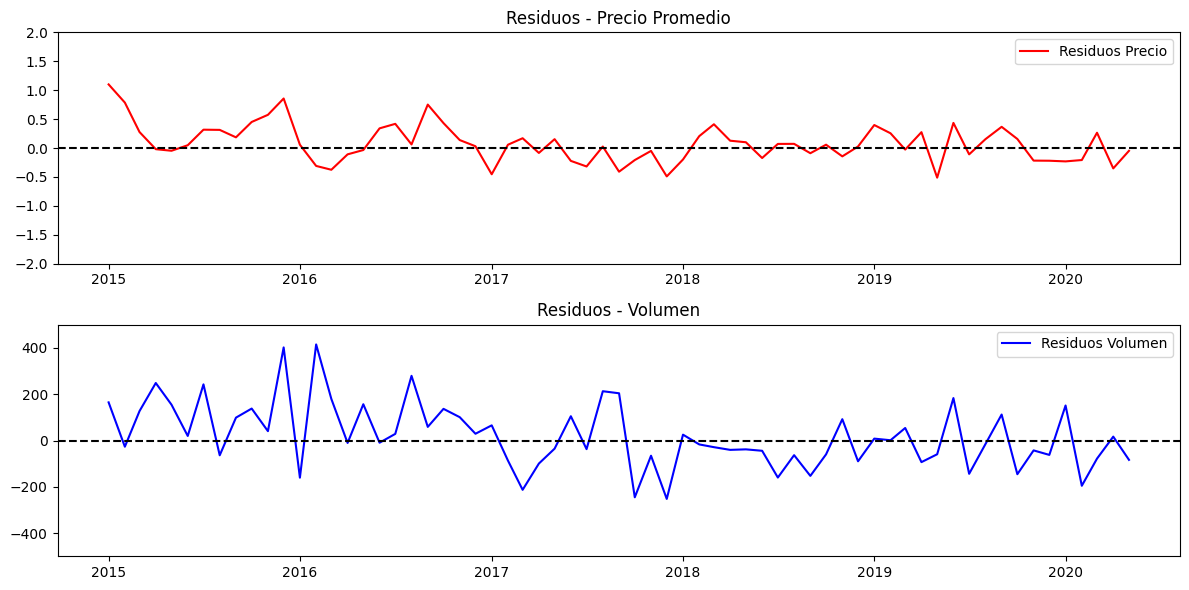

In [169]:
# Residuos para Precio Promedio y Volumen
residuals_price = data['PProm'] - train_pred_price
residuals_volume = data['Volumen'] - train_pred_volume

# Gráfico de Residuos
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(data.index, residuals_price, label='Residuos Precio', color='red')
plt.axhline(0, linestyle='--', color='black')
plt.ylim(-2, 2)  # Límite ajustado para precio
plt.title('Residuos - Precio Promedio')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data.index, residuals_volume, label='Residuos Volumen', color='blue')
plt.axhline(0, linestyle='--', color='black')
plt.ylim(-500, 500)  # Límite ajustado para volumen
plt.title('Residuos - Volumen')
plt.legend()

plt.tight_layout()
plt.show()


## Proceso de crear la demanda y verlos

In [170]:
# Crear una copia de seguridad del DataFrame original
df_original = df.copy()

# Identificar los índices con nulos o ceros para la papa Perricholi
mask_perricholi = (df['VariedadPapa'] == "Papa Perricholi") & ((df['PProm'].isnull()) | (df['PProm'] == 0) | (df['Volumen'].isnull()) | (df['Volumen'] == 0))

# Asegurarse de que el índice de la predicción y el DataFrame coincidan en formato de fecha
forecast_df.reset_index(inplace=True)
forecast_df.rename(columns={'Fecha': 'Fecha_pred'}, inplace=True)
forecast_df['Fecha_pred'] = pd.to_datetime(forecast_df['Fecha_pred'])

# Reemplazar valores nulos o 0 con las predicciones del modelo
for i, row in df[mask_perricholi].iterrows():
    fecha = row['Fecha']
    # Buscar la predicción correspondiente
    pred_row = forecast_df[forecast_df['Fecha_pred'] == fecha]
    if not pred_row.empty:
        # Actualizar los valores de PProm y Volumen si son nulos o 0
        if pd.isnull(row['PProm']) or row['PProm'] == 0:
            df.loc[i, 'PProm'] = pred_row['Precio_Predicho'].values[0]
        if pd.isnull(row['Volumen']) or row['Volumen'] == 0:
            df.loc[i, 'Volumen'] = pred_row['Volumen_Predicho'].values[0]

# Verificar que no existan valores nulos o 0 en las columnas PProm y Volumen para Papa Perricholi
check_nulls = df[(df['VariedadPapa'] == "Papa Perricholi") & ((df['PProm'].isnull()) | (df['PProm'] == 0) | (df['Volumen'].isnull()) | (df['Volumen'] == 0))]

if check_nulls.empty:
    print("No hay valores nulos ni ceros en las columnas 'PProm' y 'Volumen' para 'Papa Perricholi'.")
else:
    print("Aún hay valores nulos o ceros. Verifique los datos:")
    print(check_nulls)


Aún hay valores nulos o ceros. Verifique los datos:
         Fecha     VariedadPapa  PMax  PMin  PProm  Volumen
903 2020-04-01  Papa Perricholi   0.7  0.65   0.69      0.0


In [171]:
# Crear la columna 'Demanda' como la multiplicación entre 'Volumen' y 'PProm'
df['Demanda'] = df['Volumen'] * df['PProm']

# Comprobar las primeras filas para verificar la nueva columna
print(df[['Fecha', 'VariedadPapa', 'Volumen', 'PProm', 'Demanda']].head())

# Validar si la columna se creó correctamente
print("\nEstadísticas de la columna 'Demanda':")
print(df['Demanda'].describe())


       Fecha   VariedadPapa  Volumen  PProm  Demanda
0 2015-01-01  Papa Amarilla   1968.0   1.72  3384.96
1 2015-02-01  Papa Amarilla   1290.0   1.52  1960.80
2 2015-03-01  Papa Amarilla   1629.0   1.64  2671.56
3 2015-04-01  Papa Amarilla   1286.0   1.16  1491.76
4 2015-05-01  Papa Amarilla   1210.0   1.23  1488.30

Estadísticas de la columna 'Demanda':
count     1320.000000
mean      5286.743225
std      11099.724111
min          0.000000
25%        106.947500
50%       1242.450000
75%       4937.365000
max      95393.200000
Name: Demanda, dtype: float64


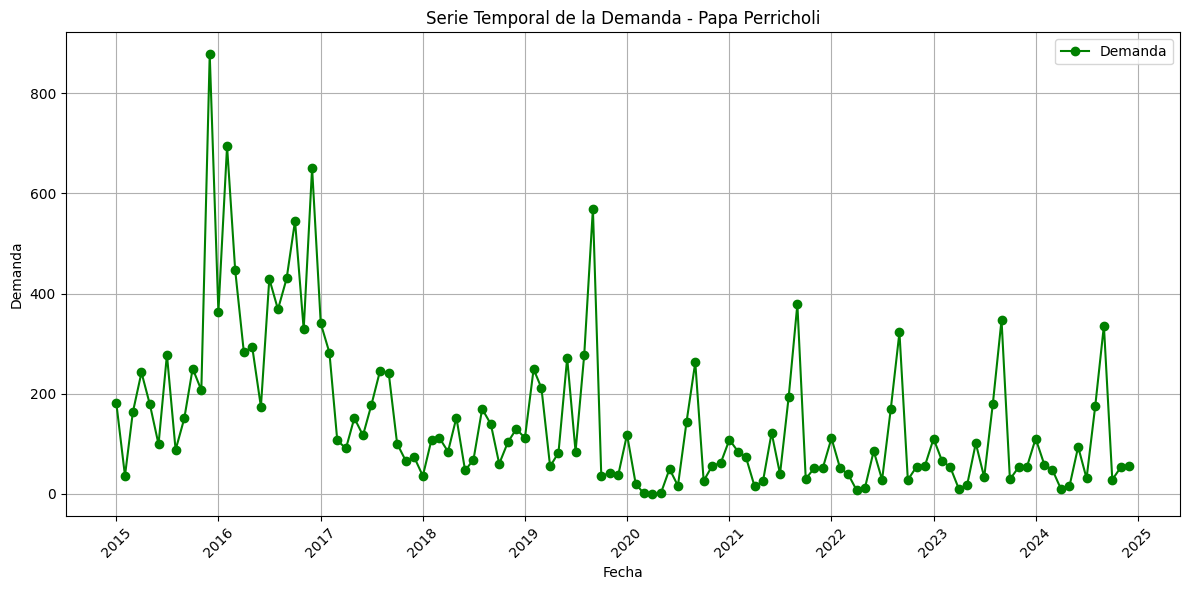

In [172]:
import matplotlib.pyplot as plt

# Verificar que la columna 'Fecha' está en formato datetime
if not pd.api.types.is_datetime64_any_dtype(df['Fecha']):
    df['Fecha'] = pd.to_datetime(df['Fecha'])

# Configurar el gráfico de la demanda
plt.figure(figsize=(12, 6))

# Filtrar para un tipo específico de papa si lo necesitas, por ejemplo, "Papa Perricholi"
filtered_df = df[df['VariedadPapa'] == "Papa Perricholi"]

# Graficar la demanda
plt.plot(filtered_df['Fecha'], filtered_df['Demanda'], label='Demanda', color='green', marker='o')

# Añadir detalles al gráfico
plt.title('Serie Temporal de la Demanda - Papa Perricholi')
plt.xlabel('Fecha')
plt.ylabel('Demanda')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [173]:
# Confirmar y mostrar el rango de tiempo en la columna 'Fecha'
fecha_minima = df['Fecha'].min()
fecha_maxima = df['Fecha'].max()
print(f"Rango de tiempo en la columna 'Fecha':")
print(f"Fecha más antigua: {fecha_minima}")
print(f"Fecha más nueva: {fecha_maxima}")

# Contar cuántos valores son 0 o nulos en la columna 'Demanda'
nulos_demanda = df['Demanda'].isnull().sum()
ceros_demanda = (df['Demanda'] == 0).sum()
print("\nRevisión de la columna 'Demanda':")
print(f"Cantidad de valores nulos: {nulos_demanda}")
print(f"Cantidad de valores en 0: {ceros_demanda}")


Rango de tiempo en la columna 'Fecha':
Fecha más antigua: 2015-01-01 00:00:00
Fecha más nueva: 2024-12-01 00:00:00

Revisión de la columna 'Demanda':
Cantidad de valores nulos: 0
Cantidad de valores en 0: 117


In [177]:
pip install pmdarima joblib tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.3 MB/s eta 0:00:00


In [181]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
import joblib
import warnings

# Suprimir advertencias innecesarias
warnings.filterwarnings("ignore", category=FutureWarning)

# Convertir la columna 'Fecha' en formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Crear una lista de variedades de papa
variedades = df['VariedadPapa'].unique()

# Contenedores para resultados y métricas
metricas = []
mejores_modelos = {}

# Barra de progreso
print("Normalizando datos, entrenando modelos SARIMA y desnormalizando resultados...")
for variedad in tqdm(variedades):
    # Filtrar datos por variedad
    data = df[df['VariedadPapa'] == variedad].copy()

    # Usar la columna 'Demanda' y rellenar faltantes
    data['Demanda'] = data['Demanda'].ffill().bfill()

    # Configurar la fecha como índice
    data.set_index('Fecha', inplace=True)

    # Validar que la serie tiene suficientes datos para entrenar
    if len(data) < 24:  # Al menos 2 años de datos mensuales
        print(f"Advertencia: No hay suficientes datos para {variedad}.")
        continue

    # Normalización de los datos
    scaler = MinMaxScaler()
    data['Demanda_normalizada'] = scaler.fit_transform(data[['Demanda']])

    # Automatizar búsqueda de los mejores hiperparámetros
    print(f"\nOptimización de hiperparámetros para {variedad}...")
    auto_model = auto_arima(
        data['Demanda_normalizada'],  # Serie temporal normalizada
        seasonal=True,                # Considerar estacionalidad
        m=12,                         # Estacionalidad anual (12 meses)
        max_order=20,                 # Máximo total de orden (p + d + q + P + D + Q)
        max_p=5, max_q=5,             # Máximo orden autoregresivo y de media móvil
        max_P=3, max_Q=3,             # Máximo orden autoregresivo y de media móvil estacional
        max_d=2, max_D=1,             # Diferenciación regular y estacional
        stepwise=True,                # Optimización por pasos para mayor velocidad
        trace=False,                  # Suprimir progreso detallado durante la optimización
        error_action="ignore",        # Ignorar errores y continuar
        suppress_warnings=True,       # Suprimir advertencias
        n_fits=50,                    # Límite de pruebas de modelos
        random_state=42               # Reproducibilidad
    )

    # Obtener los mejores hiperparámetros
    best_order = auto_model.order
    best_seasonal_order = auto_model.seasonal_order

    # Entrenar modelo con los mejores hiperparámetros
    print(f"Entrenando modelo SARIMA para {variedad} con hiperparámetros: {best_order}, {best_seasonal_order}")
    model = auto_model.fit(data['Demanda_normalizada'])

    # Guardar el modelo entrenado
    model_filename = f"sarima_model_{variedad.replace(' ', '_')}.pkl"
    joblib.dump(model, model_filename)
    mejores_modelos[variedad] = model_filename

    # Predicciones ajustadas (in-sample) para calcular métricas
    fitted_values_normalized = model.predict_in_sample()

    # Convertir valores ajustados a numpy antes de desnormalizar
    fitted_values = scaler.inverse_transform(fitted_values_normalized.to_numpy().reshape(-1, 1)).flatten()

    # Cálculo de métricas en la escala original
    mae = mean_absolute_error(data['Demanda'], fitted_values)
    rmse = np.sqrt(mean_squared_error(data['Demanda'], fitted_values))

    # Guardar métricas e hiperparámetros
    metricas.append({
        'Variedad': variedad,
        'MAE': mae,
        'RMSE': rmse,
        'Order': best_order,
        'Seasonal_Order': best_seasonal_order
    })

# Mostrar las métricas de error y los hiperparámetros para cada modelo
print("\nResultados finales:")
for metrica in metricas:
    print(f"Variedad: {metrica['Variedad']}")
    print(f"  MAE: {metrica['MAE']:.4f}")
    print(f"  RMSE: {metrica['RMSE']:.4f}")
    print(f"  Mejor Order: {metrica['Order']}")
    print(f"  Mejor Seasonal Order: {metrica['Seasonal_Order']}\n")


Normalizando datos, entrenando modelos SARIMA y desnormalizando resultados...


  0%|          | 0/11 [00:00<?, ?it/s]


Optimización de hiperparámetros para Papa Amarilla...
Entrenando modelo SARIMA para Papa Amarilla con hiperparámetros: (5, 1, 4), (0, 0, 1, 12)


  9%|▉         | 1/11 [01:05<10:55, 65.55s/it]


Optimización de hiperparámetros para Papa Blanca...
Entrenando modelo SARIMA para Papa Blanca con hiperparámetros: (2, 1, 2), (0, 0, 0, 12)


 18%|█▊        | 2/11 [01:15<04:55, 32.83s/it]


Optimización de hiperparámetros para Papa Canchan...


 27%|██▋       | 3/11 [01:22<02:48, 21.05s/it]

Entrenando modelo SARIMA para Papa Canchan con hiperparámetros: (1, 0, 0), (0, 0, 0, 12)

Optimización de hiperparámetros para Papa Color...
Entrenando modelo SARIMA para Papa Color con hiperparámetros: (1, 1, 5), (0, 0, 0, 12)


 36%|███▋      | 4/11 [01:57<03:05, 26.49s/it]


Optimización de hiperparámetros para Papa Huamantanga...


 45%|████▌     | 5/11 [02:00<01:48, 18.10s/it]

Entrenando modelo SARIMA para Papa Huamantanga con hiperparámetros: (0, 0, 1), (0, 0, 0, 12)

Optimización de hiperparámetros para Papa Huayro...
Entrenando modelo SARIMA para Papa Huayro con hiperparámetros: (3, 0, 0), (0, 0, 0, 12)


 55%|█████▍    | 6/11 [02:11<01:18, 15.75s/it]


Optimización de hiperparámetros para Papa Negra Andina...
Entrenando modelo SARIMA para Papa Negra Andina con hiperparámetros: (2, 1, 1), (0, 0, 0, 12)


 64%|██████▎   | 7/11 [03:09<01:57, 29.34s/it]


Optimización de hiperparámetros para Papa Perricholi...
Entrenando modelo SARIMA para Papa Perricholi con hiperparámetros: (0, 1, 1), (1, 0, 2, 12)


 73%|███████▎  | 8/11 [05:04<02:49, 56.62s/it]


Optimización de hiperparámetros para Papa Peruanita...


 82%|████████▏ | 9/11 [05:30<01:34, 47.12s/it]

Entrenando modelo SARIMA para Papa Peruanita con hiperparámetros: (1, 1, 1), (0, 0, 0, 12)

Optimización de hiperparámetros para Papa Unica...


 91%|█████████ | 10/11 [05:33<00:33, 33.46s/it]

Entrenando modelo SARIMA para Papa Unica con hiperparámetros: (0, 1, 0), (0, 0, 0, 12)

Optimización de hiperparámetros para Papa Yungay...


100%|██████████| 11/11 [05:36<00:00, 30.64s/it]

Entrenando modelo SARIMA para Papa Yungay con hiperparámetros: (1, 0, 0), (0, 0, 0, 12)

Resultados finales:
Variedad: Papa Amarilla
  MAE: 1511.0200
  RMSE: 2023.1060
  Mejor Order: (5, 1, 4)
  Mejor Seasonal Order: (0, 0, 1, 12)

Variedad: Papa Blanca
  MAE: 6344.5738
  RMSE: 8477.2253
  Mejor Order: (2, 1, 2)
  Mejor Seasonal Order: (0, 0, 0, 12)

Variedad: Papa Canchan
  MAE: 1025.9863
  RMSE: 1500.7722
  Mejor Order: (1, 0, 0)
  Mejor Seasonal Order: (0, 0, 0, 12)

Variedad: Papa Color
  MAE: 1234.6534
  RMSE: 1776.1399
  Mejor Order: (1, 1, 5)
  Mejor Seasonal Order: (0, 0, 0, 12)

Variedad: Papa Huamantanga
  MAE: 19.5266
  RMSE: 27.6840
  Mejor Order: (0, 0, 1)
  Mejor Seasonal Order: (0, 0, 0, 12)

Variedad: Papa Huayro
  MAE: 472.8773
  RMSE: 712.0389
  Mejor Order: (3, 0, 0)
  Mejor Seasonal Order: (0, 0, 0, 12)

Variedad: Papa Negra Andina
  MAE: 23.9331
  RMSE: 35.4494
  Mejor Order: (2, 1, 1)
  Mejor Seasonal Order: (0, 0, 0, 12)

Variedad: Papa Perricholi
  MAE: 75.7585


In [182]:
# Contenedor para métricas normalizadas
metricas_normalizadas = []

for variedad in variedades:
    # Filtrar datos por variedad
    data = df[df['VariedadPapa'] == variedad].copy()
    data['Demanda'] = data['Demanda'].ffill().bfill()
    data.set_index('Fecha', inplace=True)

    # Validar si el modelo fue entrenado para esta variedad
    if variedad not in mejores_modelos:
        print(f"No se encontró un modelo para {variedad}.")
        continue

    # Cargar el modelo entrenado
    model_filename = mejores_modelos[variedad]
    model = joblib.load(model_filename)

    # Normalizar los datos
    scaler = MinMaxScaler()
    data['Demanda_normalizada'] = scaler.fit_transform(data[['Demanda']])

    # Predicciones ajustadas normalizadas
    fitted_values_normalized = model.predict_in_sample()

    # Cálculo de MAE y RMSE normalizados
    mae_normalizado = mean_absolute_error(data['Demanda_normalizada'], fitted_values_normalized)
    rmse_normalizado = np.sqrt(mean_squared_error(data['Demanda_normalizada'], fitted_values_normalized))

    # Guardar métricas normalizadas
    metricas_normalizadas.append({
        'Variedad': variedad,
        'MAE_Normalizado': mae_normalizado,
        'RMSE_Normalizado': rmse_normalizado
    })

# Mostrar métricas normalizadas
print("\nMétricas normalizadas:")
for metrica in metricas_normalizadas:
    print(f"Variedad: {metrica['Variedad']}")
    print(f"  MAE Normalizado: {metrica['MAE_Normalizado']:.4f}")
    print(f"  RMSE Normalizado: {metrica['RMSE_Normalizado']:.4f}")



Métricas normalizadas:
Variedad: Papa Amarilla
  MAE Normalizado: 0.0845
  RMSE Normalizado: 0.1131
Variedad: Papa Blanca
  MAE Normalizado: 0.0740
  RMSE Normalizado: 0.0989
Variedad: Papa Canchan
  MAE Normalizado: 0.0834
  RMSE Normalizado: 0.1220
Variedad: Papa Color
  MAE Normalizado: 0.0918
  RMSE Normalizado: 0.1321
Variedad: Papa Huamantanga
  MAE Normalizado: 0.1426
  RMSE Normalizado: 0.2022
Variedad: Papa Huayro
  MAE Normalizado: 0.0937
  RMSE Normalizado: 0.1410
Variedad: Papa Negra Andina
  MAE Normalizado: 0.1093
  RMSE Normalizado: 0.1620
Variedad: Papa Perricholi
  MAE Normalizado: 0.0863
  RMSE Normalizado: 0.1361
Variedad: Papa Peruanita
  MAE Normalizado: 0.1142
  RMSE Normalizado: 0.1648
Variedad: Papa Unica
  MAE Normalizado: 0.0691
  RMSE Normalizado: 0.0983
Variedad: Papa Yungay
  MAE Normalizado: 0.0830
  RMSE Normalizado: 0.1114


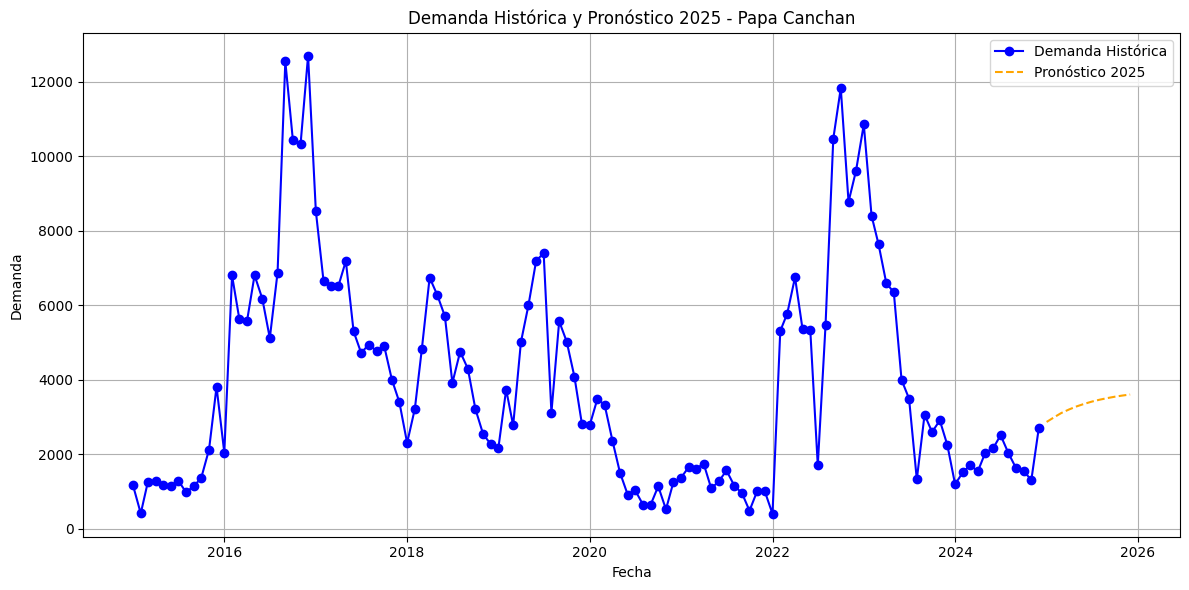

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import MinMaxScaler

# Configuración inicial
variedad_seleccionada = "Papa Canchan"  # Cambiar por la variedad deseada

# Cargar datos y filtrar por variedad
data = df[df['VariedadPapa'] == variedad_seleccionada].copy()
data['Demanda'] = data['Demanda'].ffill().bfill()
data.set_index('Fecha', inplace=True)

# Validar si el modelo existe
modelo_filename = f"sarima_model_{variedad_seleccionada.replace(' ', '_')}.pkl"
try:
    model = joblib.load(modelo_filename)
except FileNotFoundError:
    print(f"No se encontró el modelo para la variedad: {variedad_seleccionada}.")
    exit()

# Normalizar los datos de demanda
scaler = MinMaxScaler()
data['Demanda_normalizada'] = scaler.fit_transform(data[['Demanda']])

# PARA EL BACKEND :D
# Generar predicciones para 2025
inicio_forecast = '2025-01-01'
fin_forecast = '2025-12-31'
fechas_forecast = pd.date_range(start=inicio_forecast, end=fin_forecast, freq='MS')

forecast_normalizado = model.predict(n_periods=len(fechas_forecast))
forecast = scaler.inverse_transform(np.array(forecast_normalizado).reshape(-1, 1)).flatten()

# Crear un DataFrame para las predicciones
forecast_df = pd.DataFrame({
    'Fecha': fechas_forecast,
    'Demanda_Pronosticada': forecast
}).set_index('Fecha')

# Graficar la serie de tiempo
plt.figure(figsize=(12, 6))

# Serie histórica
plt.plot(data.index, data['Demanda'], label='Demanda Histórica', color='blue', marker='o')

# Pronóstico
plt.plot(forecast_df.index, forecast_df['Demanda_Pronosticada'], label='Pronóstico 2025', color='orange', linestyle='dashed')

# Configuración del gráfico
plt.title(f'Demanda Histórica y Pronóstico 2025 - {variedad_seleccionada}')
plt.xlabel('Fecha')
plt.ylabel('Demanda')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()
